In [9]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

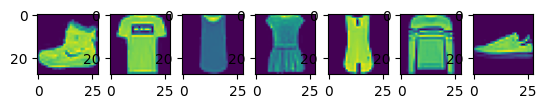

In [5]:
for i in range(7):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show()

In [6]:
input_shape = (28, 28, 1)

In [7]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      # Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      # MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [8]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [10]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8095 - loss: 0.5500 - val_accuracy: 0.8845 - val_loss: 0.3296
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9001 - loss: 0.2721 - val_accuracy: 0.8973 - val_loss: 0.2786
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9168 - loss: 0.2268 - val_accuracy: 0.8997 - val_loss: 0.2767
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9260 - loss: 0.2010 - val_accuracy: 0.9087 - val_loss: 0.2539
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9364 - loss: 0.1753 - val_accuracy: 0.9042 - val_loss: 0.2725
CPU times: total: 24.4 s
Wall time: 35.7 s


In [11]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [12]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.7728 - loss: 0.6693 - val_accuracy: 0.8333 - val_loss: 0.4692
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.8551 - loss: 0.4094 - val_accuracy: 0.8530 - val_loss: 0.4118
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - accuracy: 0.8686 - loss: 0.3700 - val_accuracy: 0.8547 - val_loss: 0.4024
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.8775 - loss: 0.3395 - val_accuracy: 0.8646 - val_loss: 0.3777
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.8805 - loss: 0.3270 - val_accuracy: 0.8645 - val_loss: 0.3704
CPU times: total: 2.58 s
Wall time: 8.36 s


In [14]:
model_3 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [15]:
model_3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
%%time

history = model_3.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7848 - loss: 0.5993 - val_accuracy: 0.8790 - val_loss: 0.3302
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8912 - loss: 0.2969 - val_accuracy: 0.8907 - val_loss: 0.3042
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9079 - loss: 0.2502 - val_accuracy: 0.9000 - val_loss: 0.2839
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9209 - loss: 0.2132 - val_accuracy: 0.9084 - val_loss: 0.2609
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9306 - loss: 0.1880 - val_accuracy: 0.9092 - val_loss: 0.2451
CPU times: total: 38.7 s
Wall time: 53.2 s


In [20]:
model_4 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [21]:
model_4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
%%time

history = model_4.fit(x_train, y_train_cat, batch_size=32, epochs=10,validation_data =(x_test, y_test_cat) )


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7669 - loss: 0.6365 - val_accuracy: 0.8761 - val_loss: 0.3457
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8988 - loss: 0.2808 - val_accuracy: 0.9024 - val_loss: 0.2665
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9122 - loss: 0.2353 - val_accuracy: 0.9056 - val_loss: 0.2617
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9265 - loss: 0.1997 - val_accuracy: 0.9114 - val_loss: 0.2488
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9367 - loss: 0.1706 - val_accuracy: 0.9119 - val_loss: 0.2615
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9437 - loss: 0.1500 - val_accuracy: 0.9204 - val_loss: 0.2327
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9528 - loss: 0.1298 - val_accuracy: 0.9172 - val_loss: 0.2485
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9581 - loss: 0

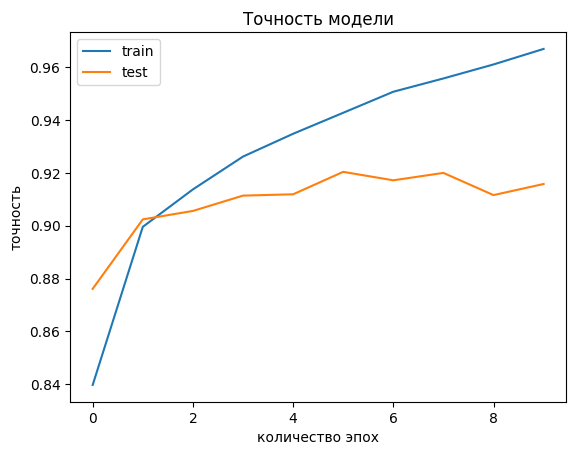

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

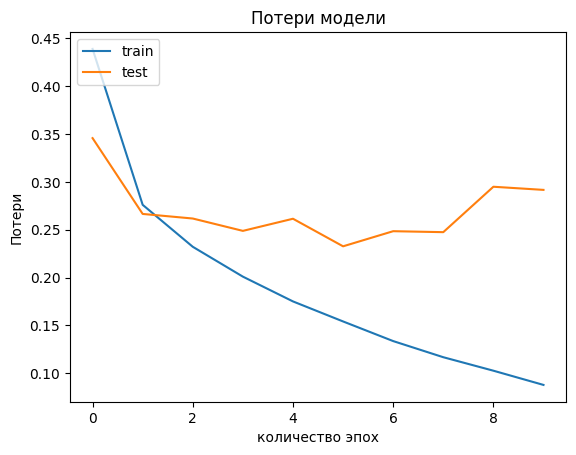

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model_4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 724,640 (2.76 MB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,094 (1.84 MB)

In [12]:
keras.utils.plot_model(model_4)

NameError: name 'model_4' is not defined